In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler

In [3]:
iris = pd.read_csv('../../assets/datasets/iris.csv')

In [4]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 1: Split the set into two sets

"X" will be the data and "Y" will be the class labels

In [5]:
X=iris.drop('Name',axis=1)
y=iris.Name

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

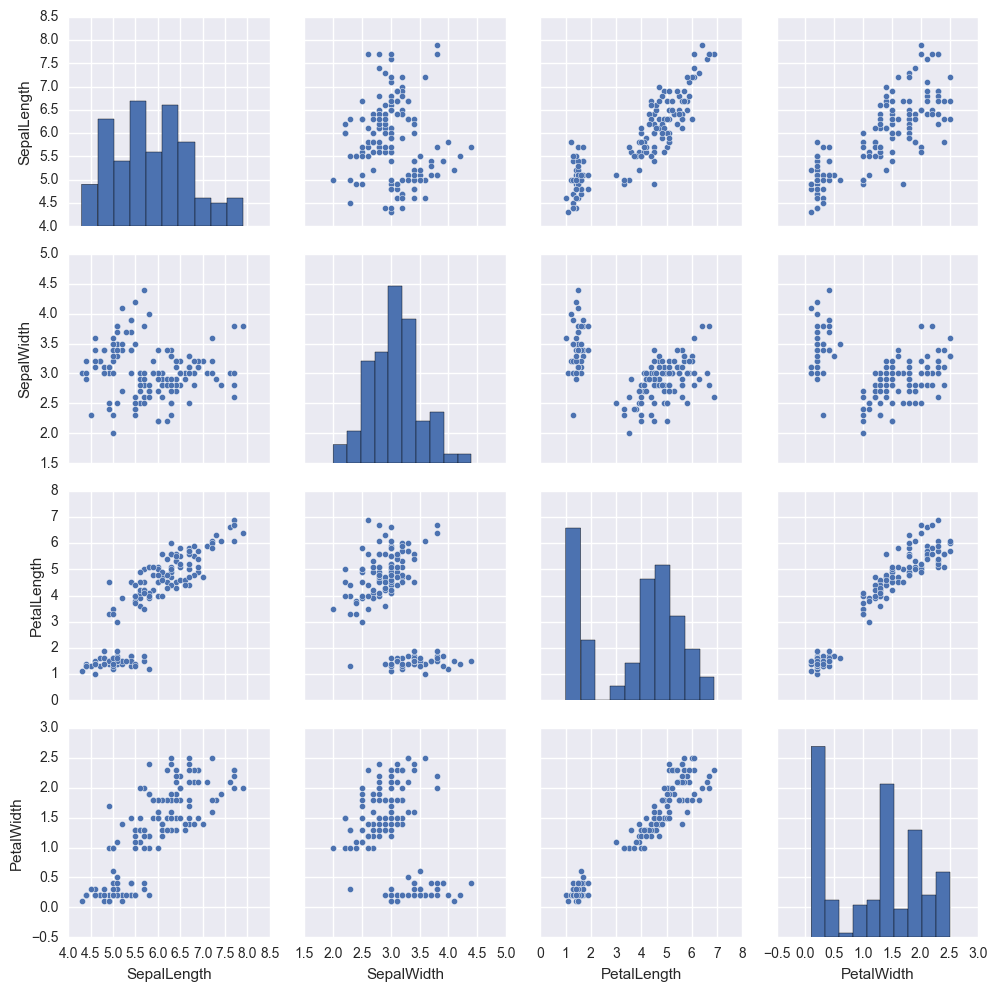

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(X)

## Step 3: Dimensionality Reduction

First, standarize the data. While the Iris data attributes are all measured in the same units (cm), this is a worthwhile step for optimization and good practice for more unruly datasets!

In [13]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


Now, let's set up our data for decomposition by creating a covariance matrix

Now, decompose the the covariance matrix

In [15]:
cov_mat=np.cov(X_scaled.T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

Check the eigenvalues and eigenvectors

In [16]:
eValue,eVector = np.linalg.eig(cov_mat)

In [19]:
print 'eigen_values\n',eValue
print 'eigen_vector\n',eVector

eigen_values
[ 2.93035378  0.92740362  0.14834223  0.02074601]
eigen_vector
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [29]:
ePairs=[(np.abs(eValue[i]),eVector[:,i]) for i in range(len(eValue))]
ePairs
ePairs.sort()
ePairs.reverse()
ePairs

[(2.9303537755893192,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627])),
 (0.92740362151734124,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.14834222648163986,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.020746013995595971,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))]

The eigenvectors with the lowest eigenvalues can be dropped

In [30]:
# eValue.sort()
# print eValue

Calculate the explained variance

In [32]:
tot = sum(eValue)
var_exp = [(i / tot)*100 for i in sorted(eValue, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  72.77045209,   95.80097536,   99.48480732,  100.        ])

What does the explained variance tell us?

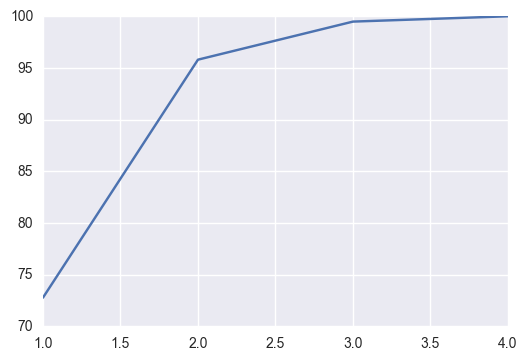

In [35]:
plt.plot(range(1,5),cum_var_exp)

In [42]:
#using sklearn
from sklearn.decomposition import PCA

In [45]:
pca=PCA(n_components=0.95)
X2 = pca.fit_transform(X_scaled)

In [46]:
X2

array([[ -2.26454173e+00,  -5.05703903e-01],
       [ -2.08642550e+00,   6.55404729e-01],
       [ -2.36795045e+00,   3.18477311e-01],
       [ -2.30419716e+00,   5.75367713e-01],
       [ -2.38877749e+00,  -6.74767397e-01],
       [ -2.07053681e+00,  -1.51854856e+00],
       [ -2.44571134e+00,  -7.45626750e-02],
       [ -2.23384186e+00,  -2.47613932e-01],
       [ -2.34195768e+00,   1.09514636e+00],
       [ -2.18867576e+00,   4.48629048e-01],
       [ -2.16348656e+00,  -1.07059558e+00],
       [ -2.32737775e+00,  -1.58587455e-01],
       [ -2.22408272e+00,   7.09118158e-01],
       [ -2.63971626e+00,   9.38281982e-01],
       [ -2.19229151e+00,  -1.88997851e+00],
       [ -2.25146521e+00,  -2.72237108e+00],
       [ -2.20275048e+00,  -1.51375028e+00],
       [ -2.19017916e+00,  -5.14304308e-01],
       [ -1.89407429e+00,  -1.43111071e+00],
       [ -2.33994907e+00,  -1.15803343e+00],
       [ -1.91455639e+00,  -4.30465163e-01],
       [ -2.20464540e+00,  -9.52457317e-01],
       [ -

In [47]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577]])